In [408]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("data/internet_service_churn.csv")
df.head

<bound method NDFrame.head of             id  is_tv_subscriber  is_movie_package_subscriber  \
0           15                 1                            0   
1           18                 0                            0   
2           23                 1                            0   
3           27                 0                            0   
4           34                 0                            0   
...        ...               ...                          ...   
72269  1689648                 1                            1   
72270  1689676                 1                            0   
72271  1689679                 1                            0   
72272  1689733                 0                            0   
72273  1689744                 1                            1   

       subscription_age  bill_avg  reamining_contract  service_failure_count  \
0                 11.95        25                0.14                      0   
1                  8.22      

In [409]:
df.rename(columns={'reamining_contract': 'remaining_contract'}, inplace=True)


In [410]:
df.shape

(72274, 11)

In [411]:
df.dtypes

id                               int64
is_tv_subscriber                 int64
is_movie_package_subscriber      int64
subscription_age               float64
bill_avg                         int64
remaining_contract             float64
service_failure_count            int64
download_avg                   float64
upload_avg                     float64
download_over_limit              int64
churn                            int64
dtype: object

In [412]:
# Виявлення відсутніх значень у кожній колонці
missing_values = df.isnull().sum()
print("Кількість відсутніх значень у кожній колонці:")
print(missing_values)

Кількість відсутніх значень у кожній колонці:
id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
remaining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64


!!!!! пропоную видалити тих кілька рядків, де download_avarage i upload_avarage не мають значень.

In [413]:
df = df.dropna(subset=['download_avg'])
df.shape

(71893, 11)

In [414]:
df = df.dropna(subset=['upload_avg'])
df.shape

(71893, 11)

In [415]:
df.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
remaining_contract             21518
service_failure_count              0
download_avg                       0
upload_avg                         0
download_over_limit                0
churn                              0
dtype: int64

In [416]:
# Запис очищеного датафрейму у CSV-файл
df.to_csv('data/partially_cleaned_data.csv', index=False)

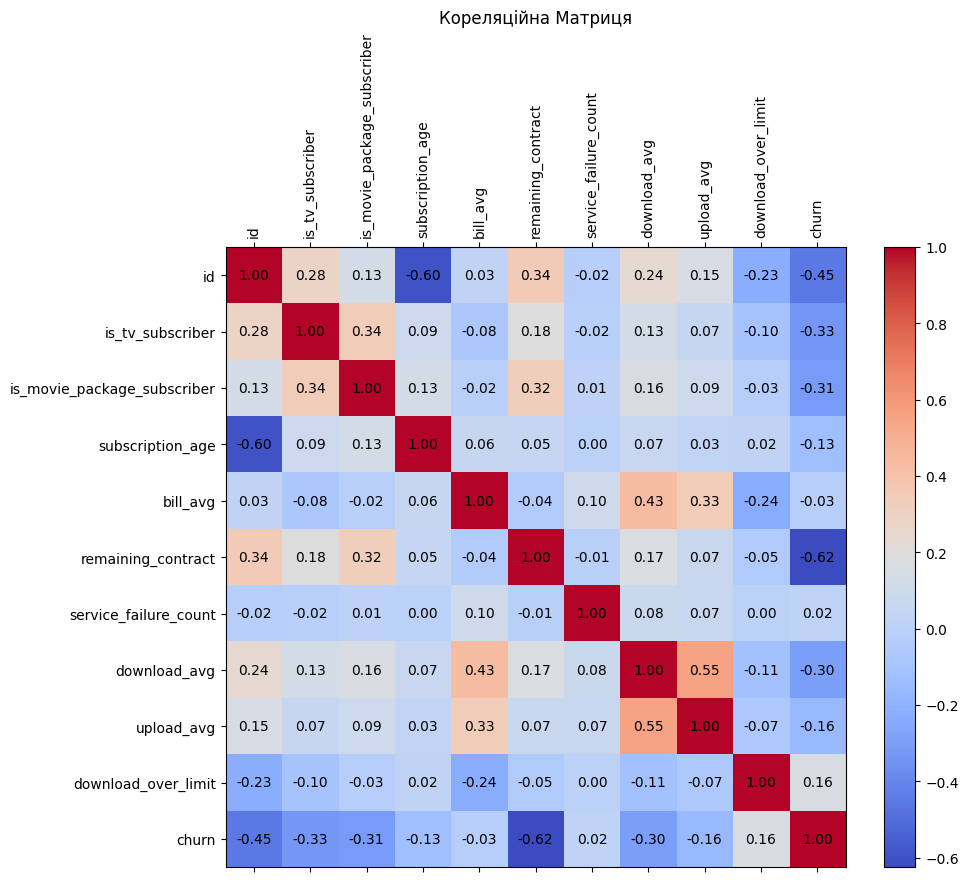

In [417]:
# Розрахунок кореляційної матриці
correlation_matrix = df.corr()

# Виведення кореляційної матриці
#print("Кореляційна матриця:")
#print(correlation_matrix)

# Візуалізація кореляційної матриці
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')

# Додавання міток осей
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Додавання кольорової смуги
plt.colorbar()

# Додавання числових значень на теплову карту
for (i, j), val in np.ndenumerate(correlation_matrix.values):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.title('Кореляційна Матриця')
plt.savefig("results/correlation_matrix_full.png")
plt.show()

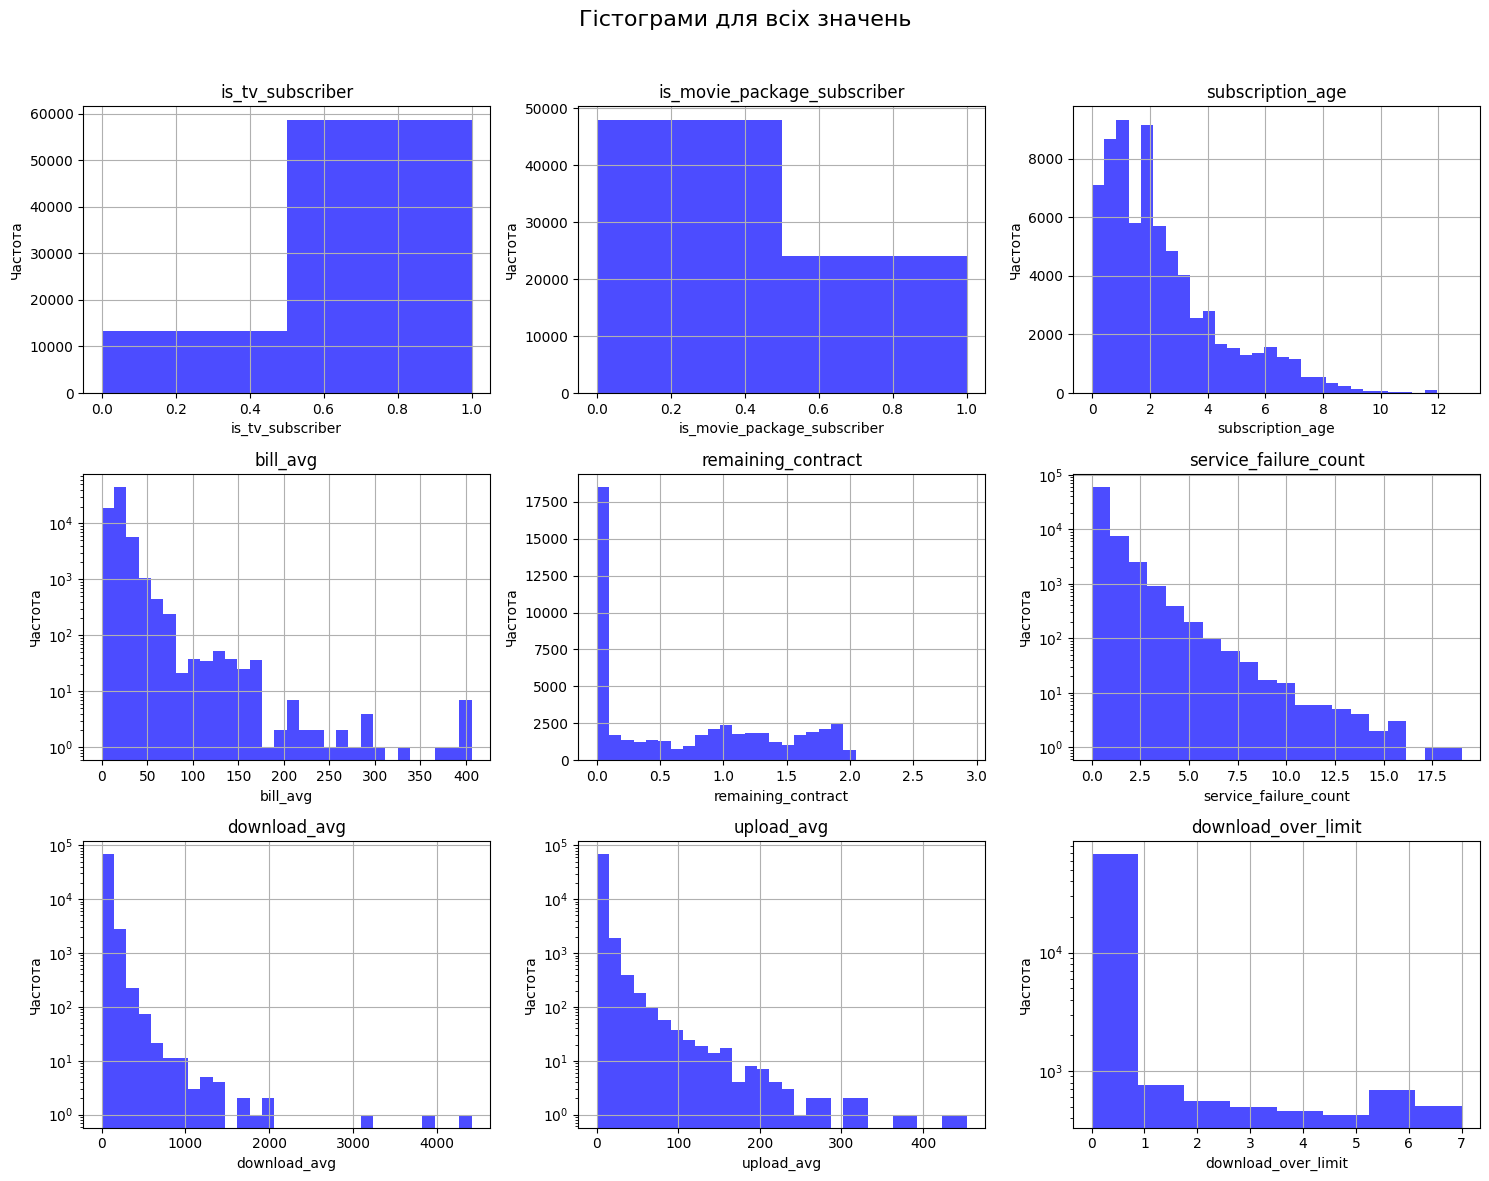

In [418]:
# Вибір колонок для побудови гістограм (без першої та останньої)
columns_to_plot = df.columns[1:-1]

# Створення фігури та підграфіків (3 рядки по 3 підграфіки)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 сітка, загальний розмір фігури 15x12 дюймів
fig.suptitle('Гістограми для всіх значень', fontsize=16)

# Перебір колонок і відповідних підграфіків
for i, column in enumerate(columns_to_plot):
    ax = axes[i // 3, i % 3]  # Вибір підграфіка в сітці
    nof_bins = 30
    if i == 0 or i == 1: nof_bins = 2 
    if i == 5 or i == 8: nof_bins = int(df[column].max())+1
    
    ax.hist(df[column].dropna(), bins=nof_bins, color='blue', alpha=0.7)  # Побудова гістограми
    ax.set_title(f'{column}')  # Назва для кожного підграфіка
    ax.set_xlabel(column)
    ax.set_ylabel('Частота')
    ax.grid(True)  # Додавання сітки
    if i == 3 or i == 5 or i == 6 or i == 7 or i == 8: ax.set_yscale("log")

# Автоматичне коригування відстаней між підграфіками
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Відображення фігури
plt.savefig("results/histograms_raw.png")
plt.show()


In [419]:
filtered_df = df[(df['download_avg'] == 0) & (df['upload_avg'] == 0)]
missing_values_count = filtered_df['remaining_contract'].isna().sum()
missing_values_count

5881

In [420]:

filtered_df = df[(df['download_avg'] != 0) & (df['upload_avg'] != 0)]
missing_values_count = filtered_df['remaining_contract'].isna().sum()
missing_values_count

15195

In [421]:
filtered_df = df[df['remaining_contract'].isna()]
filtered_df['download_avg'].mean()

26.134510642252998

In [422]:
# Фільтрація значень, які не дорівнюють нулю і не є NaN
non_zero_values = df['remaining_contract'][df['remaining_contract'] != 0].dropna()

# Знаходження найменшого значення
non_zero_values.min()

0.01

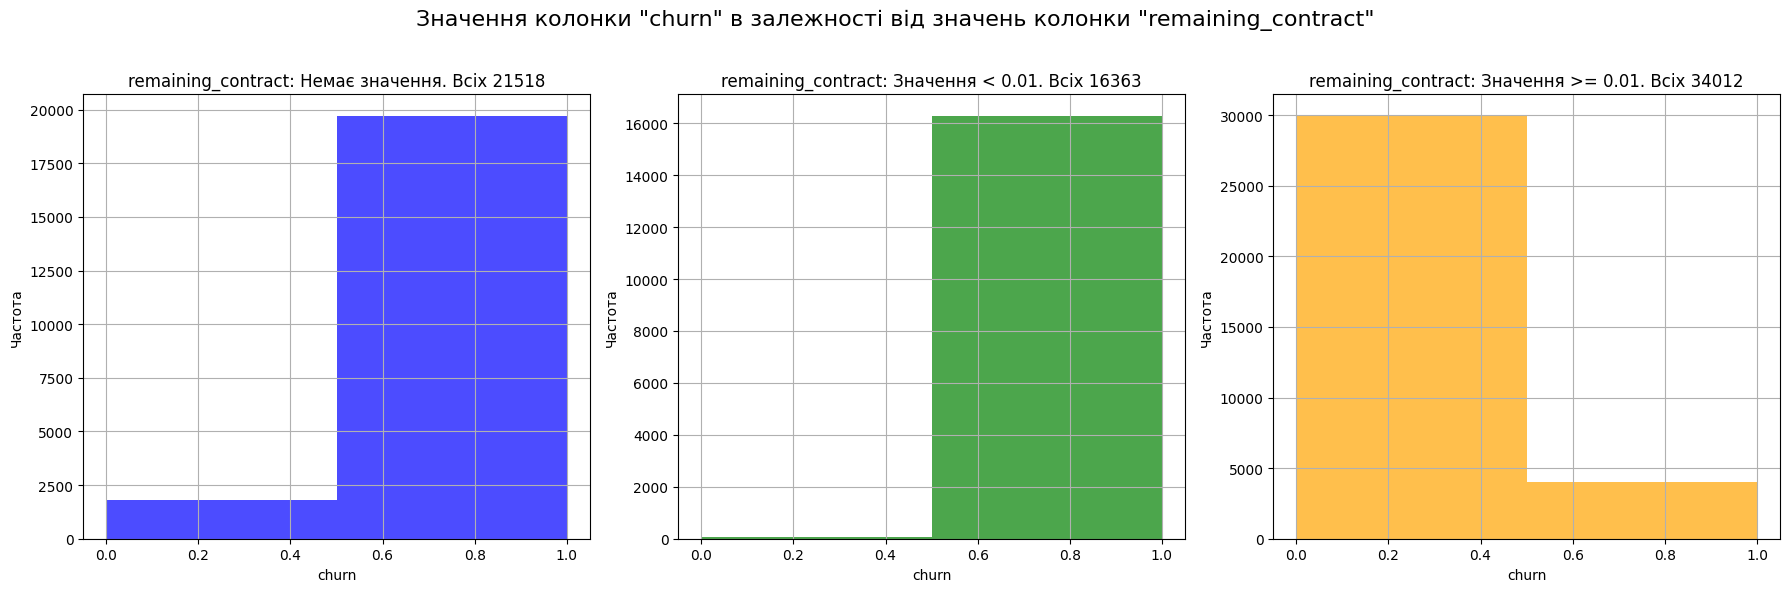

In [423]:
# Створення фігури та підграфіків (1 рядок, 3 стовпці)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Значення колонки "churn" в залежності від значень колонки "remaining_contract"', fontsize=16)

# Графік 1: Значення в колонці "churn", де в колонці "remaining_contract" немає значення
axes[0].hist(df[df['remaining_contract'].isna()]['churn'].dropna(), bins=2, color='blue', alpha=0.7)
axes[0].set_title('remaining_contract: Немає значення. Всіх '+str(df[df['remaining_contract'].isna()].shape[0]))
axes[0].set_xlabel('churn')
axes[0].set_ylabel('Частота')
axes[0].grid(True)

# Графік 2: Значення в колонці "churn", де в колонці "remaining_contract" дорівнює 0
axes[1].hist(df[df['remaining_contract'] < 0.01]['churn'].dropna(), bins=2, color='green', alpha=0.7)
axes[1].set_title('remaining_contract: Значення < 0.01. Всіх '+str(df[df["remaining_contract"]<0.01].shape[0]))
axes[1].set_xlabel('churn')
axes[1].set_ylabel('Частота')
axes[1].grid(True)
#axes[1].set_yscale("log")

# Графік 3: Значення в колонці "churn", де в колонці "remaining_contract" не нуль
axes[2].hist(df[df['remaining_contract'] >= 0.01]['churn'].dropna(), bins=2, color='orange', alpha=0.7)
axes[2].set_title('remaining_contract: Значення >= 0.01. Всіх ' + str(df[df["remaining_contract"]>=0.01].shape[0]))
axes[2].set_xlabel('churn')
axes[2].set_ylabel('Частота')
axes[2].grid(True)

# Автоматичне коригування відстаней між підграфіками
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Відображення фігури
plt.savefig("results/churn_vs_remaining_contract.png")
plt.show()

print ()

(4040, 11)


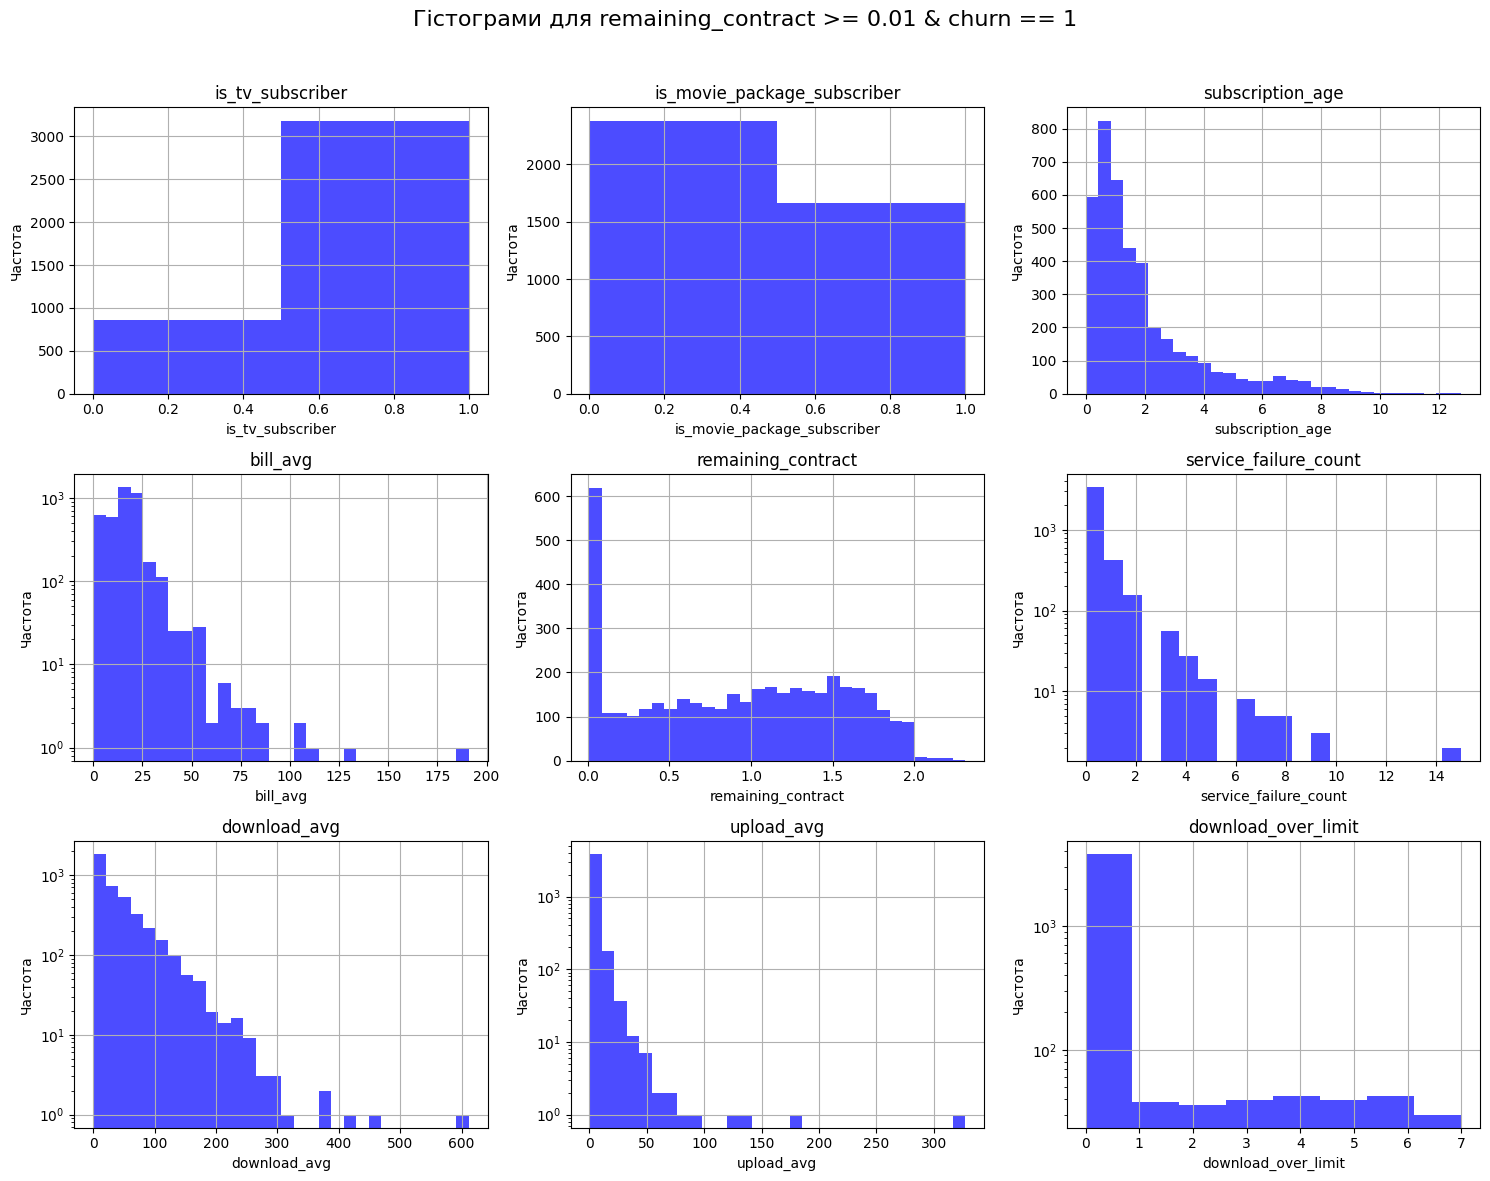

In [424]:
# Фільтрація рядків, де remaining_contract не дорівнює 0 і churn = 1
filtered_df = df[(df['remaining_contract'] >= 0.01) & (df['churn'] == 1)]
print(filtered_df.shape)
# Вибір колонок для побудови гістограм (без першої та останньої)
columns_to_plot = filtered_df.columns[1:-1]


# Створення фігури та підграфіків (3 рядки по 3 підграфіки)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 сітка, загальний розмір фігури 15x12 дюймів
fig.suptitle('Гістограми для remaining_contract >= 0.01 & churn == 1', fontsize=16)

# Перебір колонок і відповідних підграфіків
for i, column in enumerate(columns_to_plot):
    ax = axes[i // 3, i % 3]  # Вибір підграфіка в сітці
    nof_bins = 30
    if i == 0 or i == 1: nof_bins = 2 
    if i == 5 or i == 8: nof_bins = int(df[column].max())+1
    
    ax.hist(filtered_df[column].dropna(), bins=nof_bins, color='blue', alpha=0.7)  # Побудова гістограми
    ax.set_title(f'{column}')  # Назва для кожного підграфіка
    ax.set_xlabel(column)
    ax.set_ylabel('Частота')
    ax.grid(True)  # Додавання сітки
    if i == 3 or i == 5 or i == 6 or i == 7 or i == 8: ax.set_yscale("log")

# Автоматичне коригування відстаней між підграфіками
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Відображення фігури
plt.savefig("results/hist_for_remainig_contract_not_zero_churn_one.png")
plt.show()

(21518, 11)


/Users/hanna/Library/Python/3.11/lib/python/site-packages/matplotlib/axes/_axes.py:6868: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


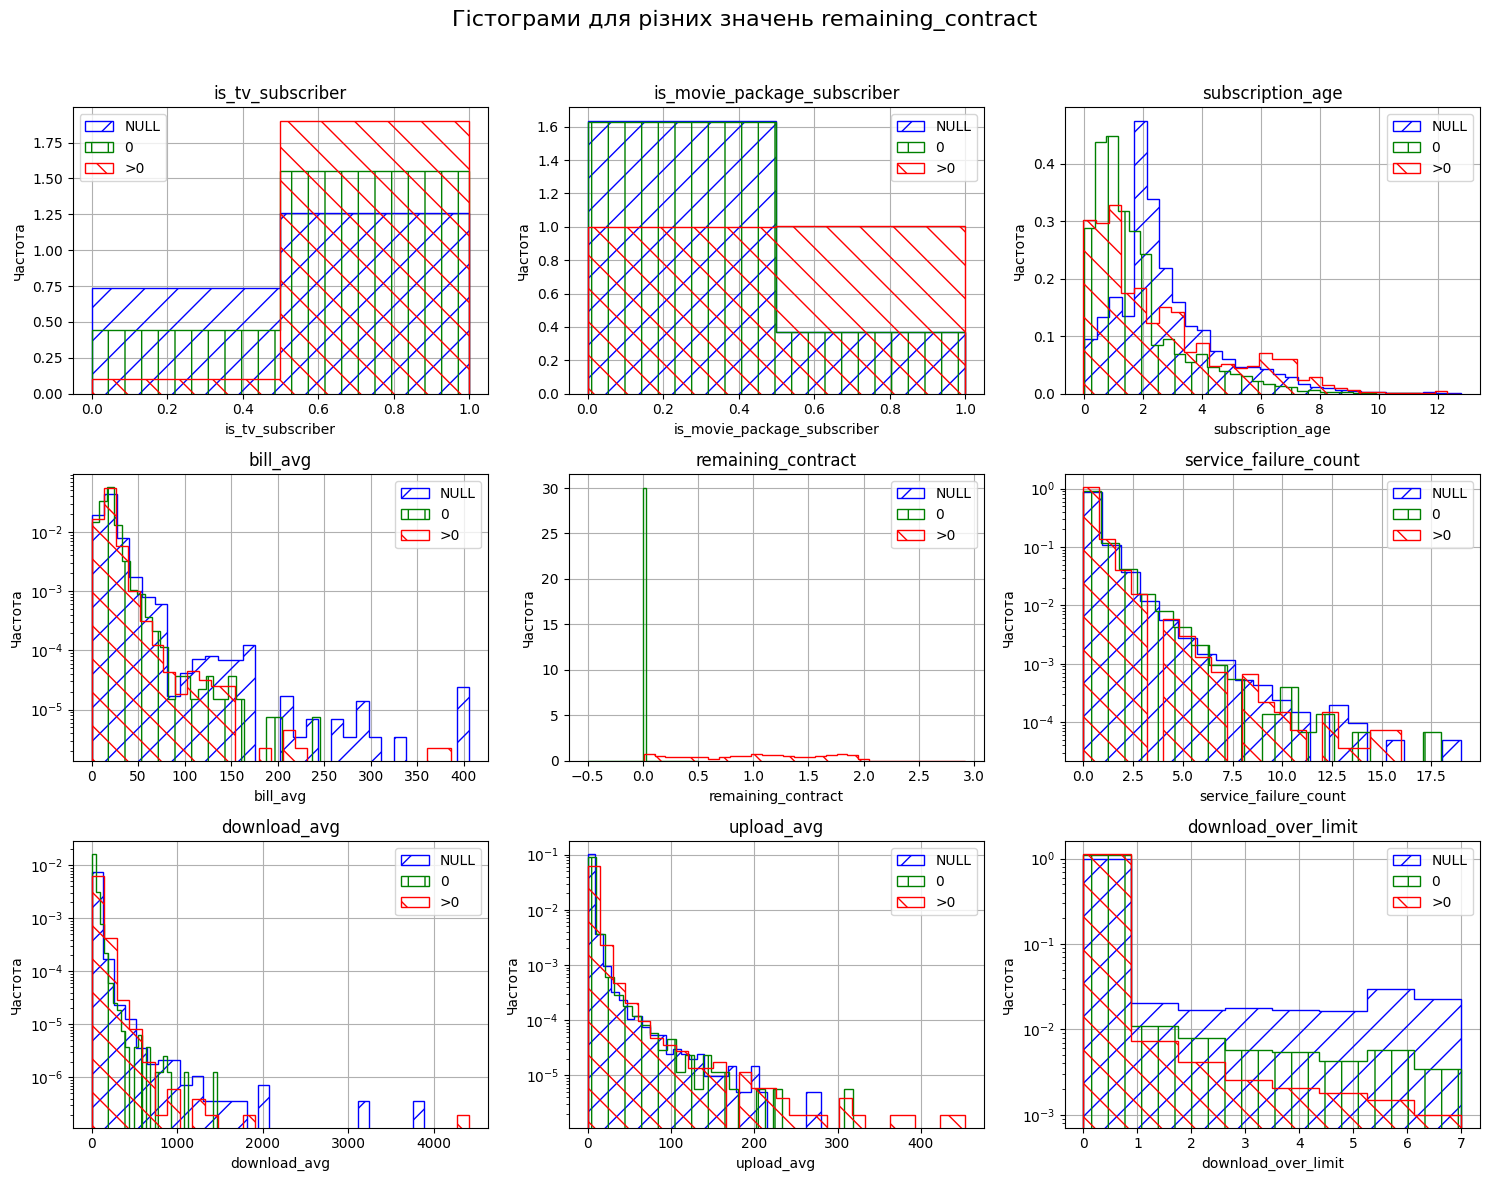

In [425]:
# Фільтрація рядків
filtered_df = df[(df['remaining_contract'].isna())]
filtered_df1 = df[(df['remaining_contract']<0.01)]
filtered_df2 = df[(df['remaining_contract']>=0.01)]
print(filtered_df.shape)
# Вибір колонок для побудови гістограм (без першої та останньої)
columns_to_plot = filtered_df.columns[1:-1]


# Створення фігури та підграфіків (3 рядки по 3 підграфіки)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 сітка, загальний розмір фігури 15x12 дюймів
fig.suptitle('Гістограми для різних значень remaining_contract', fontsize=16)

# Перебір колонок і відповідних підграфіків
for i, column in enumerate(columns_to_plot):
    ax = axes[i // 3, i % 3]  # Вибір підграфіка в сітці
    nof_bins = 30
    if i == 0 or i == 1: nof_bins = 2 
    if i == 5 or i == 8: nof_bins = int(df[column].max())+1
    
    ax.hist(filtered_df[column].dropna(), bins=nof_bins, edgecolor='blue',label = "NULL", density = True, stacked = True, hatch = "/", histtype = "step")  # Побудова гістограми
    ax.hist(filtered_df1[column].dropna(), bins=nof_bins, edgecolor='green', label = "0", density = True, stacked = True, hatch = "|", histtype = "step")  # Побудова гістограми
    ax.hist(filtered_df2[column].dropna(), bins=nof_bins, edgecolor='red', label = ">0", density = True, stacked = True, hatch = "\\", histtype = "step")  # Побудова гістограми
    ax.set_title(f'{column}')  # Назва для кожного підграфіка
    ax.set_xlabel(column)
    ax.set_ylabel('Частота')
    ax.legend()
    ax.grid(True)  # Додавання сітки
    if i == 3 or i == 5 or i == 6 or i == 7 or i == 8: ax.set_yscale("log")

# Автоматичне коригування відстаней між підграфіками
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Відображення фігури
plt.savefig("results/hist_for_different_remaining_contract.png")
plt.show()

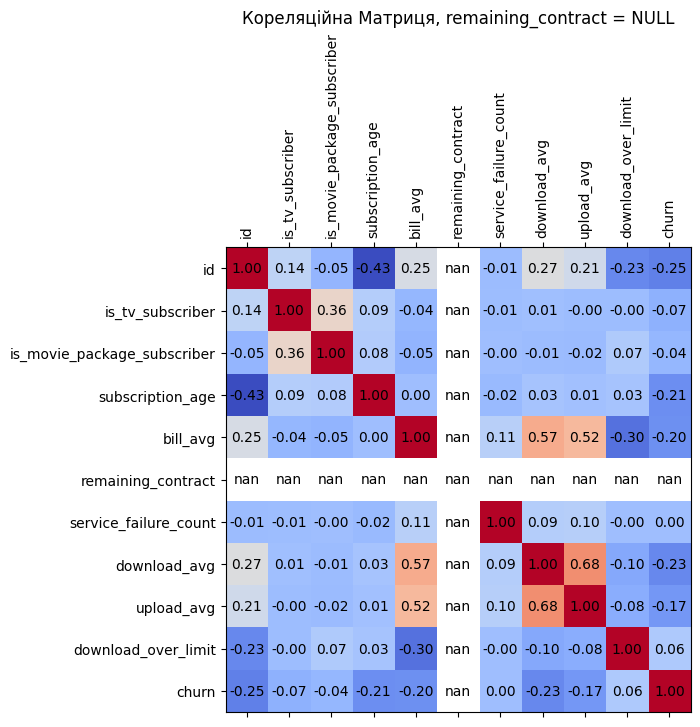

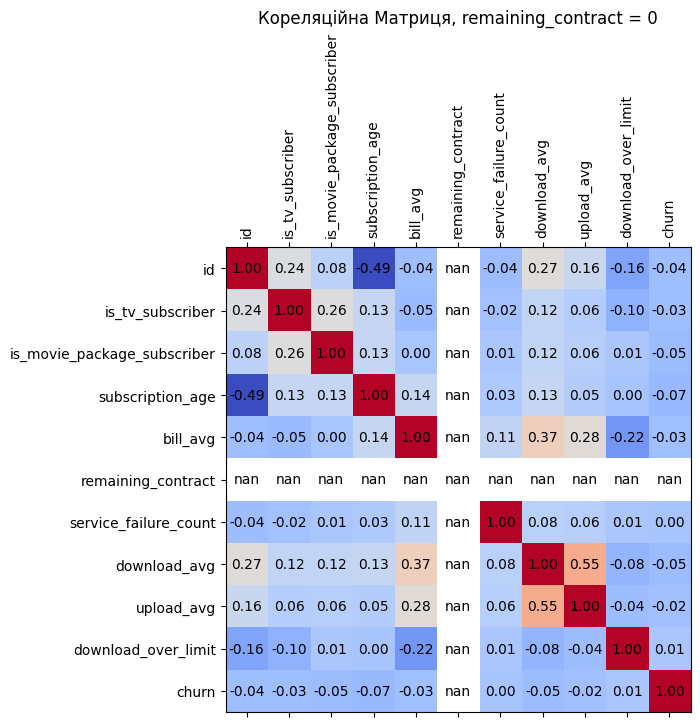

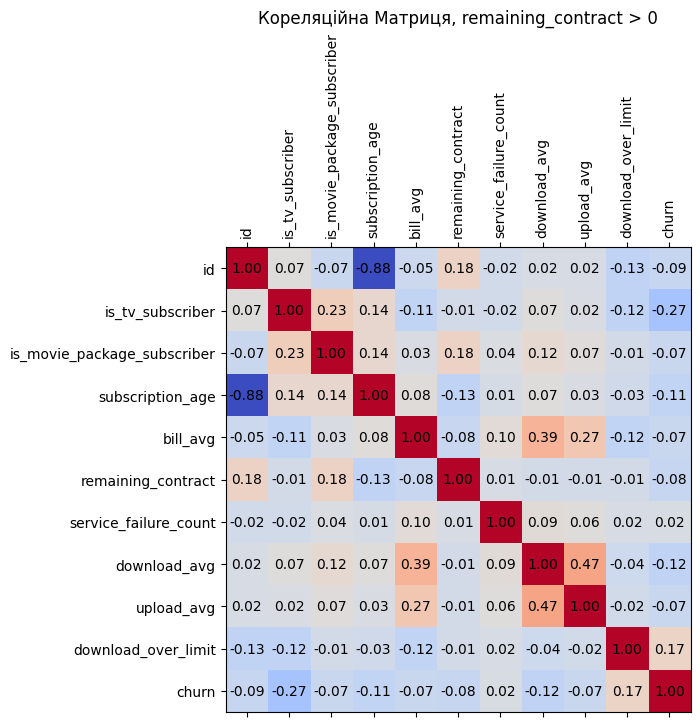

In [426]:
correlation_matrix = filtered_df.corr()
plt.figure(figsize=(10, 6))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
for (i, j), val in np.ndenumerate(correlation_matrix.values):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
plt.title('Кореляційна Матриця, remaining_contract = NULL')
plt.savefig("results/correlation_matrix_remaining_contract_null.png",bbox_inches = "tight")
plt.show()

correlation_matrix1 = filtered_df1.corr()
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix1, fignum=1, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix1.columns)), correlation_matrix1.columns, rotation=90)
plt.yticks(range(len(correlation_matrix1.columns)), correlation_matrix1.columns)
for (i, j), val in np.ndenumerate(correlation_matrix1.values):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
plt.title('Кореляційна Матриця, remaining_contract = 0')
plt.savefig("results/correlation_matrix_remaining_contract_zero.png",bbox_inches = "tight")
plt.show()

correlation_matrix2 = filtered_df2.corr()
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix2, fignum=1, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix2.columns)), correlation_matrix2.columns, rotation=90)
plt.yticks(range(len(correlation_matrix2.columns)), correlation_matrix2.columns)
for (i, j), val in np.ndenumerate(correlation_matrix2.values):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
plt.title('Кореляційна Матриця, remaining_contract > 0')
plt.savefig("results/correlation_matrix_remaining_contract_not_zero.png",bbox_inches = "tight")
plt.show()
#plt.savefig("results/correlation_matrix_full.png")
#plt.savefig("results/correlation_matrix_full.png")

In [427]:
df["remaining_contract"] = df["remaining_contract"].fillna(-1)


In [428]:
print(df.isnull().sum()) 
df.shape

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
remaining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64


(71893, 11)

In [429]:
columns_to_normalize = ["subscription_age", "bill_avg", "remaining_contract", "service_failure_count", "download_avg", "upload_avg", "download_over_limit"]
#columns_to_categorical = ["is_tv_subscriber", "is_movie_package_subscriber"]

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df[columns_to_normalize] = pd.DataFrame(scaler.fit_transform(df[columns_to_normalize]))
df.to_csv("data/cleaned_remaining_na_-1.csv",index=False,mode="w")
df_test = pd.read_csv("data/cleaned_remaining_na_-1.csv")
print(df_test.isnull().sum()) 
df_test.shape

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
remaining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64


(71893, 11)

In [430]:
#df[columns_to_categorical] = df[columns_to_categorical].astype("category")

In [431]:
# Видаляємо колонку 'remaining_contract' з DataFrame
df_wo_remaining = df.drop('remaining_contract', axis=1)



In [432]:
# Запис очищеного датафрейму у CSV-файл
df_wo_remaining.to_csv('data/cleaned_norm_data.csv', index=False)